<a href="https://colab.research.google.com/github/Thujaina/NIT-Internship/blob/main/sigmoid_CE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install imblearn

In [2]:
!pip install seaborn

In [3]:
!pip install -U tensorflow scikeras imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 620.7/620.7 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.19.0
    Uninstalling tensorboard-2.19.0:
      Successfully uninstalled tensorboard-2.19.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.19.0
    Uninstalling tensorflow-2.19.0:
      Successfully uninstalled tensorflow-2.19.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.19.0 requires tensorflow<2.20,>=2.19.0, but you have tensorflow 2.20.0 which is incompatible.
tf-keras 2.19.0 requires tensorflow<2.20,>=2.19, but you have tensorflow 2.20.0 which is incompatible.
tensorflow-decision-forests 1.12.0 requires tensorflow==2.19.0, but you have tensorflow 2.20.0 which is inc

In [4]:
!pip install scikeras

In [5]:
!pip install -U scikit-learn scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, confusion_matrix, matthews_corrcoef

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")


In [7]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [8]:
TRAIN_PATH = "/content/drive/MyDrive/datasets/ECG/mitbih_train.csv"
TEST_PATH  = "/content/drive/MyDrive/datasets/ECG/mitbih_test.csv"

train = pd.read_csv(TRAIN_PATH, header=None)
test  = pd.read_csv(TEST_PATH, header=None)

print("Train shape:", train.shape)
print("Test shape:", test.shape)


Train shape: (87554, 188)
Test shape: (21892, 188)


In [9]:
X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

X_test = test.iloc[:, :-1]
y_test = test.iloc[:, -1]


In [10]:
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)


In [11]:
y_res_cat  = to_categorical(y_res, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)


In [12]:
X_train, X_val, y_train, y_val = train_test_split(
    X_res, y_res_cat, test_size=0.2, random_state=0
)


In [13]:
def sigmoid_cross_entropy(y_true, y_logits):
    loss = tf.nn.sigmoid_cross_entropy_with_logits(
        labels=y_true,
        logits=y_logits
    )
    return tf.reduce_mean(loss)


In [14]:
def ann_model():
    model = Sequential([
        Dense(128, activation="relu", input_shape=(X_train.shape[1],)),
        Dense(64, activation="relu"),
        Dense(5, activation=None)  # IMPORTANT: logits
    ])

    model.compile(
        optimizer="adam",
        loss=sigmoid_cross_entropy,
        metrics=["accuracy"]
    )

    return model


In [15]:
model = ann_model()

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.8230 - loss: 0.1712 - val_accuracy: 0.9468 - val_loss: 0.0611
Epoch 2/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.9505 - loss: 0.0563 - val_accuracy: 0.9622 - val_loss: 0.0444
Epoch 3/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 28s 6ms/step - accuracy: 0.9669 - loss: 0.0400 - val_accuracy: 0.9710 - val_loss: 0.0349
Epoch 4/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 31s 7ms/step - accuracy: 0.9755 - loss: 0.0309 - val_accuracy: 0.9803 - val_loss: 0.0260
Epoch 5/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 29s 4ms/step - accuracy: 0.9794 - loss: 0.0262 - val_accuracy: 0.9784 - val_loss: 0.0257
Epoch 6/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 19s 4ms/step - accuracy: 0.9819 - loss: 0.0228 - val_accuracy: 0.9845 - val_loss: 0.0213
Epoch 7/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.9846 - loss: 0.0203 - val_accuracy: 0.9842 - val_loss: 0.0206
Epoch 8/10
4530/4530 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9870 - loss: 0

In [16]:
y_val_logits = model.predict(X_val)
y_val_pred = (tf.nn.sigmoid(y_val_logits) > 0.5).numpy().astype(int)

mcc = matthews_corrcoef(
    y_val.argmax(axis=1),
    y_val_pred.argmax(axis=1)
)

print("Validation MCC:", mcc)


2265/2265 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Validation MCC: 0.9787968824340528


In [17]:
test_logits = model.predict(X_test)
test_predictions = (tf.nn.sigmoid(test_logits) > 0.5).numpy().astype(int)

test_loss, test_acc = model.evaluate(X_test, y_test_cat)

print("Test Accuracy:", test_acc)
print("Test Loss:", test_loss)


685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
685/685 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9713 - loss: 0.0405
Test Accuracy: 0.9648730158805847
Test Loss: 0.05690653622150421


In [18]:
print(
    classification_report(
        y_test_cat.argmax(axis=1),
        test_predictions.argmax(axis=1)
    )
)


              precision    recall  f1-score   support

           0       0.99      0.98      0.98     18118
           1       0.58      0.79      0.67       556
           2       0.94      0.93      0.94      1448
           3       0.76      0.78      0.77       162
           4       0.99      0.97      0.98      1608

    accuracy                           0.97     21892
   macro avg       0.85      0.89      0.87     21892
weighted avg       0.97      0.97      0.97     21892



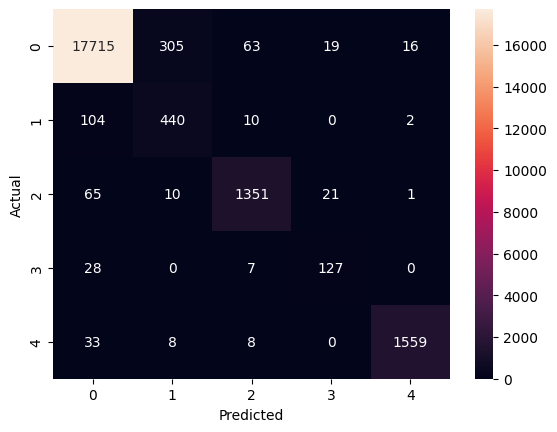

In [19]:
cm = confusion_matrix(
    y_test_cat.argmax(axis=1),
    test_predictions.argmax(axis=1)
)

sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=4, shuffle=True, random_state=42)

fold = 1
mcc_scores = []
acc_scores = []

for train_idx, val_idx in kfold.split(X_res):
    print(f"\n🔁 Fold {fold}")

    X_tr, X_va = X_res.iloc[train_idx], X_res.iloc[val_idx]
    y_tr, y_va = y_res_cat[train_idx], y_res_cat[val_idx]

    model = ann_model()

    model.fit(
        X_tr, y_tr,
        epochs=10,
        batch_size=64,
        verbose=0
    )

    # Predictions
    val_logits = model.predict(X_va)
    val_pred = (tf.nn.sigmoid(val_logits) > 0.5).numpy().astype(int)

    # Metrics
    acc = np.mean(
        val_pred.argmax(axis=1) == y_va.argmax(axis=1)
    )

    mcc = matthews_corrcoef(
        y_va.argmax(axis=1),
        val_pred.argmax(axis=1)
    )

    acc_scores.append(acc)
    mcc_scores.append(mcc)

    print(f"Accuracy: {acc:.4f}")
    print(f"MCC: {mcc:.4f}")

    fold += 1

print("\n✅ Cross-Validation Results")
print("Accuracy per fold:", acc_scores)
print("Mean Accuracy:", np.mean(acc_scores))
print("MCC per fold:", mcc_scores)
print("Mean MCC:", np.mean(mcc_scores))



🔁 Fold 1
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Accuracy: 0.9871
MCC: 0.9838

🔁 Fold 2
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Accuracy: 0.9883
MCC: 0.9854

🔁 Fold 3
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Accuracy: 0.9878
MCC: 0.9848

🔁 Fold 4
2831/2831 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Accuracy: 0.9870
MCC: 0.9837

✅ Cross-Validation Results
Accuracy per fold: [np.float64(0.9870514080075947), np.float64(0.9883429555464791), np.float64(0.9878462064930621), np.float64(0.9869739921402393)]
Mean Accuracy: 0.9875536405468438
MCC per fold: [0.9838303376567756, 0.9854366860506051, 0.9848127651184737, 0.9837422107970065]
Mean MCC: 0.9844554999057152
